In [37]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load datasets
customers = pd.read_csv('C:/Users/dell/OneDrive/Desktop/ZeoTap/Customers.csv')
transactions = pd.read_csv('C:/Users/dell/OneDrive/Desktop/ZeoTap/Transactions.csv')

In [39]:
# Merge customers and transactions
merged_data = transactions.merge(customers, on='CustomerID')

In [40]:
# Feature engineering: Create customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    AvgOrderValue=('TotalValue', 'mean'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()

In [41]:
# Normalize the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(customer_profiles[['TotalSpending', 'AvgOrderValue', 'TotalQuantity']])

In [42]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(normalized_data)

# Add cluster labels to the original data
customer_profiles['Cluster'] = labels

In [43]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_data, labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.99


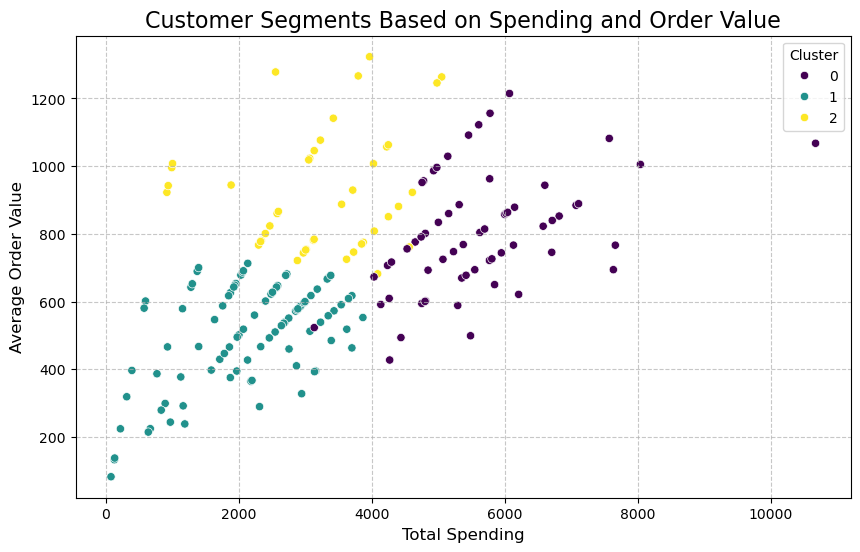

In [44]:
# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_profiles['TotalSpending'], 
    y=customer_profiles['AvgOrderValue'], 
    hue=customer_profiles['Cluster'], 
    palette='viridis'
)
plt.title('Customer Segments Based on Spending and Order Value', fontsize=16)
plt.xlabel('Total Spending', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Cluster 0: High spenders with high average order value—likely loyal or premium customers.
### Cluster 1: Moderate spenders with average transaction size—possibly regular customers.
### Cluster 2: Low spenders with low transaction volume—potential new or inactive customers.

In [45]:
# Group the data by clusters to summarize spending behavior.
numeric_columns = customer_profiles.select_dtypes(include='number').columns
cluster_summary = customer_profiles[numeric_columns].groupby(customer_profiles['Cluster']).mean()

print(cluster_summary)

         TotalSpending  AvgOrderValue  TotalQuantity  Cluster
Cluster                                                      
0          5602.371935     797.090096      19.983871      0.0
1          2158.925484     506.139569       9.376344      1.0
2          3224.282500     916.770235       9.681818      2.0
